In [56]:
# Cell 1: Setup and Imports
# Install necessary libraries
!pip install requests pandas matplotlib statsmodels

import requests
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
import vectorbt as vbt


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [57]:
# Exploring Cryptocurrency Data from Exchanges

## 1. Setup and Imports

# Install necessary libraries
!pip install requests pandas matplotlib statsmodels

import requests
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [58]:
def fetch_coinbase_data(coin='BTC-USD'):
    url = f'https://api.pro.coinbase.com/products/{coin}/candles'
    params = {
        'granularity': 60  # data per minute
    }
    response = requests.get(url, params=params)
    data = response.json()
    
    df = pd.DataFrame(data, columns=['timestamp', 'low', 'high', 'open', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
    return df

# Fetch data
btc_data = fetch_coinbase_data('BTC-USD')
btc_data.head()


,timestamp,low,high,open,close,volume
0,2024-07-05 12:41:00,55292.84,55375.00,55292.84,55341.36,11.403754
1,2024-07-05 12:40:00,55215.28,55353.94,55252.69,55292.07,18.880710
2,2024-07-05 12:39:00,55184.60,55275.56,55206.81,55251.30,17.036166
3,2024-07-05 12:38:00,55184.23,55276.48,55194.00,55197.73,16.581123
4,2024-07-05 12:37:00,55168.16,55299.19,55244.97,55194.85,14.465282


In [59]:
btc_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  300 non-null    datetime64[ns]
 1   low        300 non-null    float64       
 2   high       300 non-null    float64       
 3   open       300 non-null    float64       
 4   close      300 non-null    float64       
 5   volume     300 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 14.2 KB


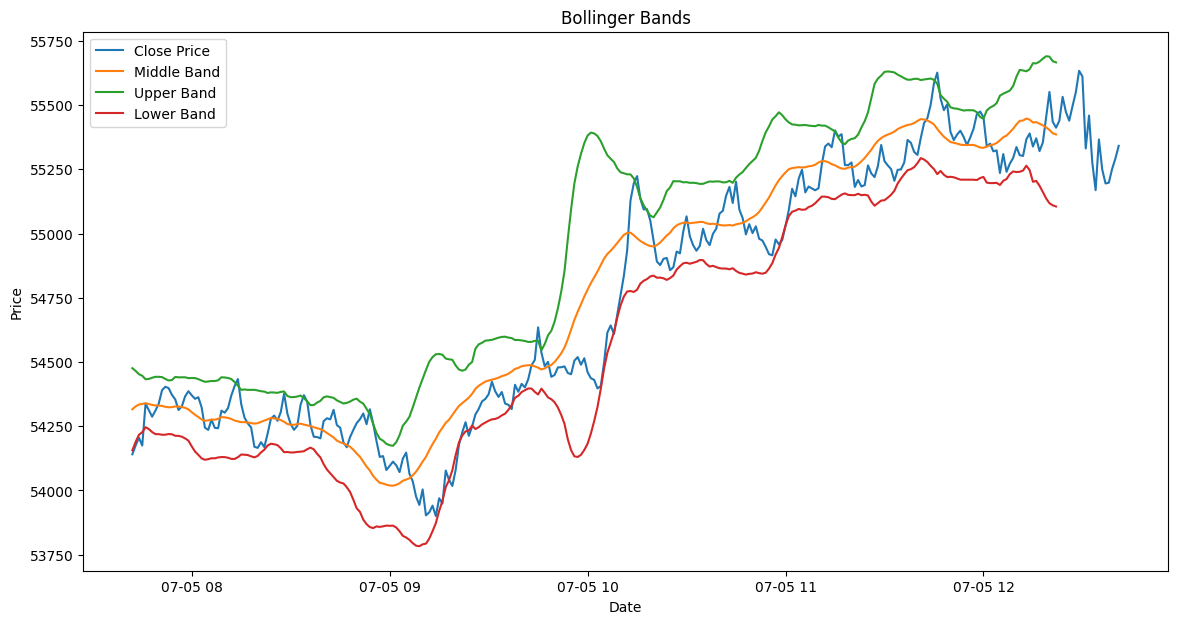

In [60]:
def bollinger_bands_analysis(df, window=20):
    df['middle_band'] = df['close'].rolling(window=window).mean()
    df['upper_band'] = df['middle_band'] + (df['close'].rolling(window=window).std() * 2)
    df['lower_band'] = df['middle_band'] - (df['close'].rolling(window=window).std() * 2)
    
    plt.figure(figsize=(14, 7))
    plt.plot(df['timestamp'], df['close'], label='Close Price')
    plt.plot(df['timestamp'], df['middle_band'], label='Middle Band')
    plt.plot(df['timestamp'], df['upper_band'], label='Upper Band')
    plt.plot(df['timestamp'], df['lower_band'], label='Lower Band')
    plt.legend()
    plt.title('Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

# Perform Bollinger Bands analysis
bollinger_bands_analysis(btc_data)

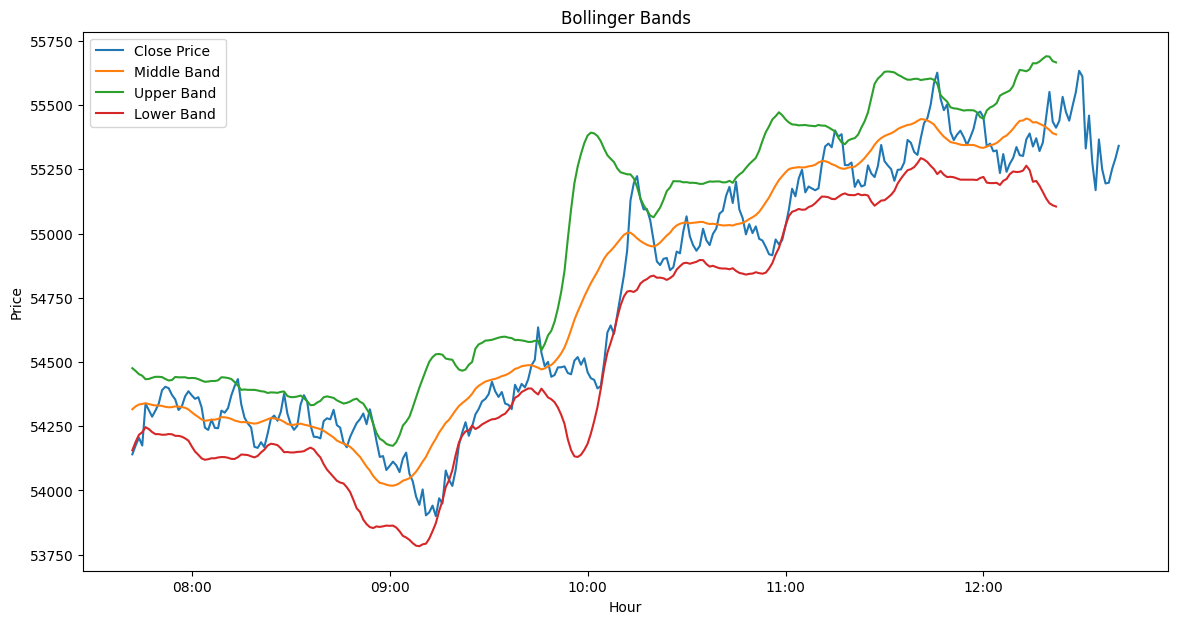

In [61]:
import matplotlib.dates as mdates

def bollinger_bands_analysis(df, window=20):
    df['middle_band'] = df['close'].rolling(window=window).mean()
    df['upper_band'] = df['middle_band'] + (df['close'].rolling(window=window).std() * 2)
    df['lower_band'] = df['middle_band'] - (df['close'].rolling(window=window).std() * 2)
    
    # Ensure 'timestamp' is a datetime type
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    plt.figure(figsize=(14, 7))
    plt.plot(df['timestamp'], df['close'], label='Close Price')
    plt.plot(df['timestamp'], df['middle_band'], label='Middle Band')
    plt.plot(df['timestamp'], df['upper_band'], label='Upper Band')
    plt.plot(df['timestamp'], df['lower_band'], label='Lower Band')
    plt.legend()
    plt.title('Bollinger Bands')
    
    # Set x-axis to display hours
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator())
    
    plt.xlabel('Hour')
    plt.ylabel('Price')
    plt.show()

# Perform Bollinger Bands analysis
bollinger_bands_analysis(btc_data)

## make the rules

In [62]:
btc_data.tail()

,timestamp,low,high,open,close,volume,middle_band,upper_band,lower_band
295,2024-07-05 07:46:00,54179.44,54341.44,54179.44,54337.79,19.742795,54339.4495,54432.736229,54246.162771
296,2024-07-05 07:45:00,54116.22,54200.31,54200.05,54174.69,20.329810,54336.4120,54446.416454,54226.407546
297,2024-07-05 07:44:00,54156.53,54236.10,54173.49,54205.00,11.284320,54334.4495,54452.484201,54216.414799
298,2024-07-05 07:43:00,54110.30,54178.41,54143.22,54174.99,6.025774,54327.0270,54464.968375,54189.085625
299,2024-07-05 07:42:00,54124.78,54158.74,54124.78,54140.43,6.119590,54315.9090,54475.809896,54156.008104


In [63]:
btc_data['buy/sell'] = btc_data.apply(
    lambda row: 'buy' if row['close'] >= row['upper_band']
    else (
        'sell' if row['close'] <= row['lower_band']
        else 'hold'
        ),
    axis=1)

In [64]:
btc_data.tail()

,timestamp,low,high,open,close,volume,middle_band,upper_band,lower_band,buy/sell
295,2024-07-05 07:46:00,54179.44,54341.44,54179.44,54337.79,19.742795,54339.4495,54432.736229,54246.162771,hold
296,2024-07-05 07:45:00,54116.22,54200.31,54200.05,54174.69,20.329810,54336.4120,54446.416454,54226.407546,sell
297,2024-07-05 07:44:00,54156.53,54236.10,54173.49,54205.00,11.284320,54334.4495,54452.484201,54216.414799,sell
298,2024-07-05 07:43:00,54110.30,54178.41,54143.22,54174.99,6.025774,54327.0270,54464.968375,54189.085625,sell
299,2024-07-05 07:42:00,54124.78,54158.74,54124.78,54140.43,6.119590,54315.9090,54475.809896,54156.008104,sell


In [65]:
btc_data['buy/sell'].value_counts()

buy/sell
hold    273
sell     14
buy      13
Name: count, dtype: int64

In [66]:
import vectorbt as vbt

# Extract the close prices
close_prices = btc_data['close']

# Generate entry and exit signals
entries = btc_data['buy/sell'] == 'buy'
exits = btc_data['buy/sell'] == 'sell'

In [67]:
entries

0      False
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Name: buy/sell, Length: 300, dtype: bool

In [68]:
# Create the portfolio
portfolio = vbt.Portfolio.from_signals(
    close_prices,
    entries,
    exits,
    init_cash=10000,  # initial capital
    fees=0.001,  # transaction fees
    freq='1T'  # Set frequency to 1 minute
)

# Print the performance stats
print(portfolio.stats())

# Visualize the results
portfolio.plot().show()

Start                                       0
End                                       299
Period                        0 days 05:00:00
Start Value                           10000.0
End Value                         9685.687945
Total Return [%]                    -3.143121
Benchmark Return [%]                -2.170041
Max Gross Exposure [%]                  100.0
Total Fees Paid                     78.528198
Max Drawdown [%]                     3.349763
Max Drawdown Duration         0 days 04:04:00
Total Trades                                4
Total Closed Trades                         4
Total Open Trades                           0
Open Trade PnL                            0.0
Win Rate [%]                              0.0
Best Trade [%]                      -0.357564
Worst Trade [%]                     -1.081647
Avg Winning Trade [%]                     NaN
Avg Losing Trade [%]                -0.795632
Avg Winning Trade Duration                NaT
Avg Losing Trade Duration     0 da